In [1]:
# importing libraries
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
import matplotlib
import os
import math
from scipy.stats import bootstrap,ttest_ind
from matplotlib.ticker import FormatStrFormatter

In [2]:
# importing py files
import gen_mandelbrot as gm
import sampling_alg as sa
import antithetic as at
import area as ar

In [3]:
if not os.path.isdir("figures"):
            os.makedirs("figures")
plt.figure()
plt.close('all')
plt.rcParams["font.size"] = 22

## Images of the Mandelbrot set

In [4]:
cur_center = -0.8 + 0.0j
cur_extent = 3.0 + 3.0j

resolution = 256 * 4
# XY-quadrant that will be inspected
cur_width = resolution  # (x axis); real numbers
cur_height = resolution  # (y axis); imaginary

cur_max_iter = resolution  # convergence test search depth

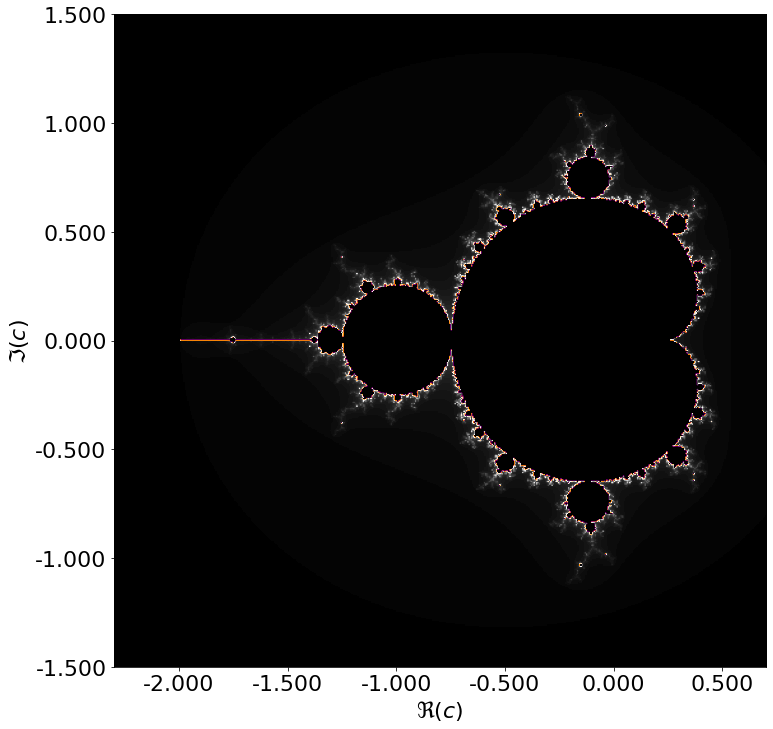

In [5]:
gm.draw_mandelbrot(cur_center, cur_extent,fname="mandelbrot_final",resolution=256*2**1)

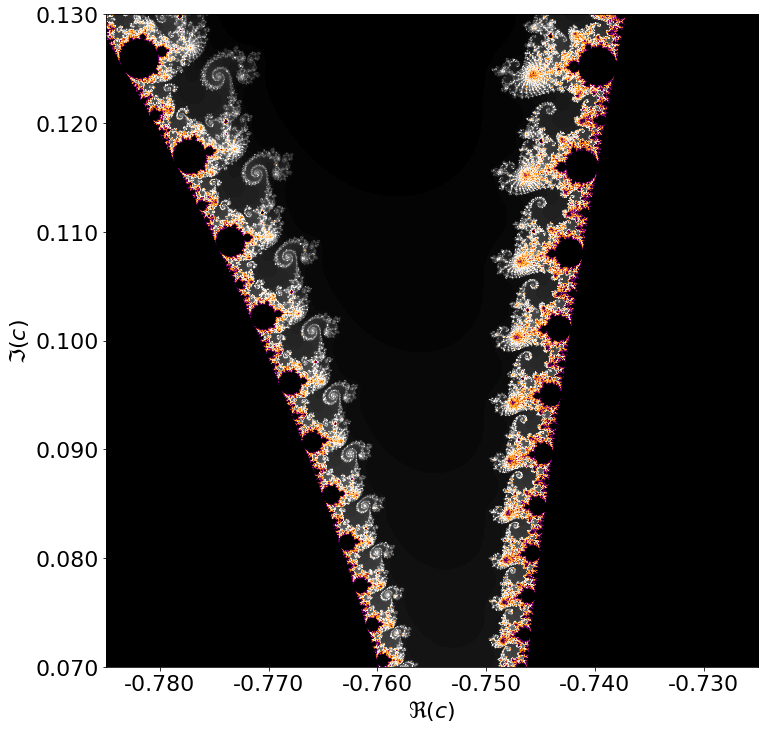

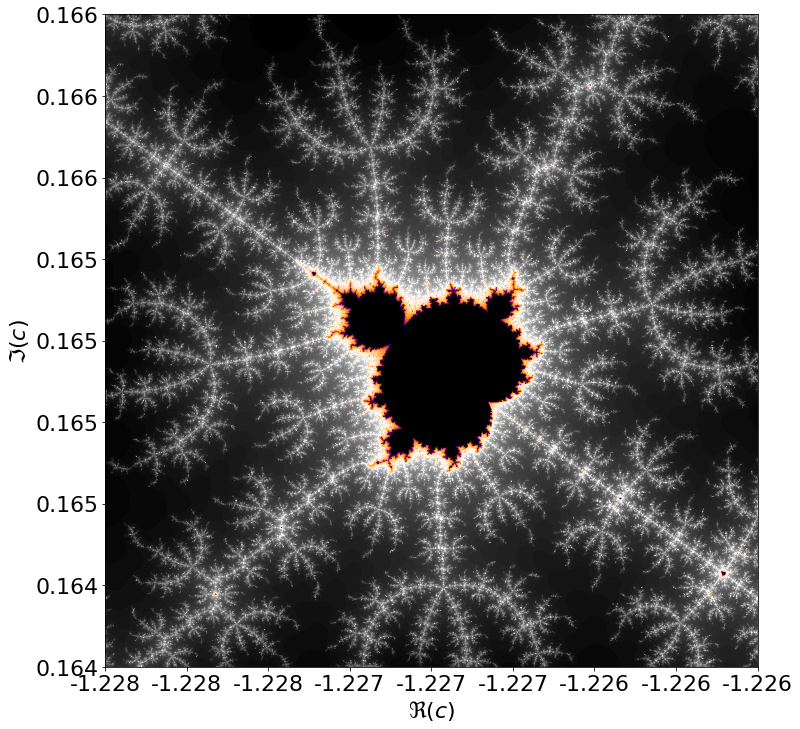

In [6]:
# seahorse valley
cur_center = -0.755 + 0.1j
cur_extent = .06 + .06j
gm.draw_mandelbrot(cur_center, cur_extent,fname="outline_mb",resolution=256*2**2)
#
# a small bit
cur_center = -1.227 + 0.165j
cur_extent = .002 + .002j
gm.draw_mandelbrot(cur_center, cur_extent,fname="small_mb",resolution=256*2*2)

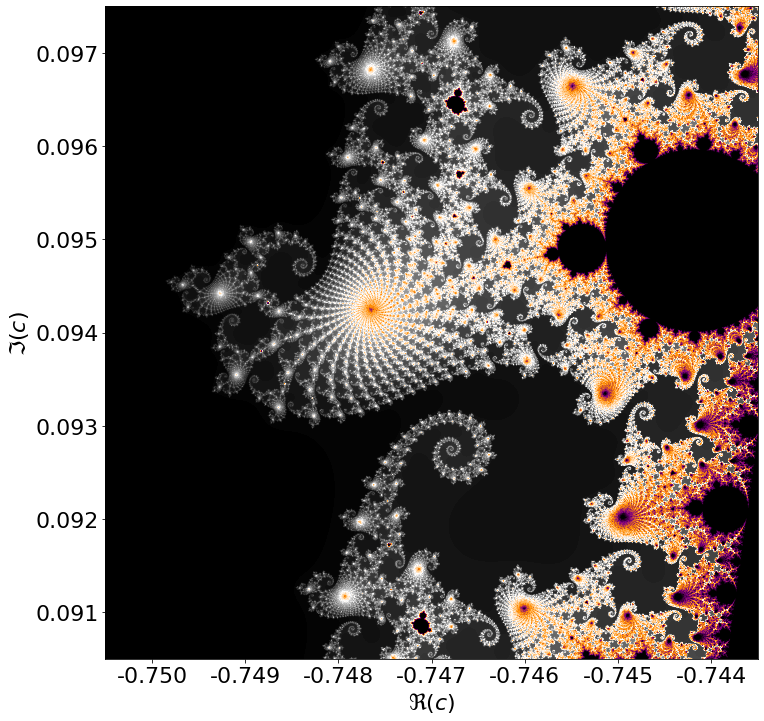

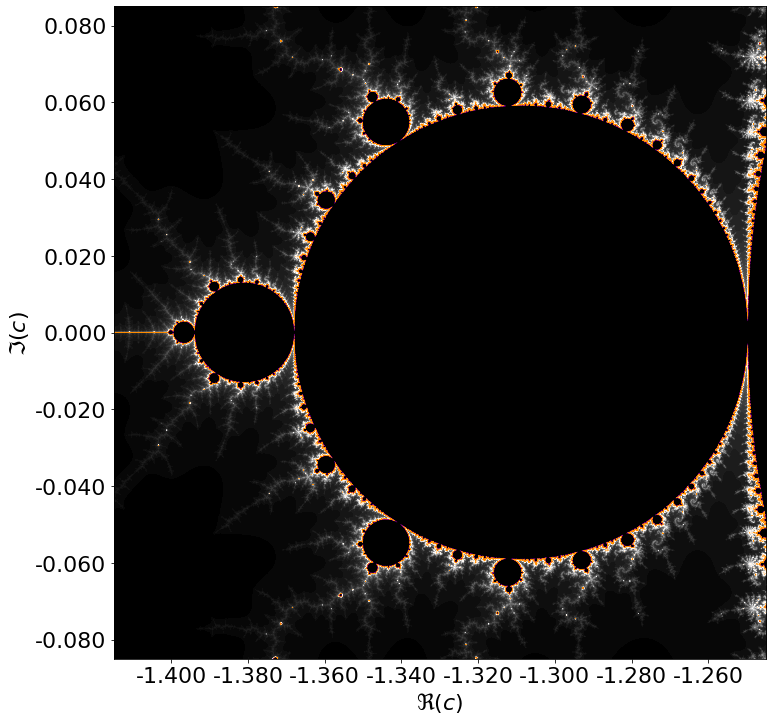

In [7]:
# nautilus
cur_center =  -.747 + 0.094j
cur_extent = .007 + .007j
gm.draw_mandelbrot(cur_center=cur_center, cur_extent=cur_extent,fname="nautilus_mb",resolution=256*2**3,color_list=["black","white","darkorange","purple","black"])


# self-similarity
cur_center =  -1.33 + 0j
cur_extent = .17 + .17j
gm.draw_mandelbrot(cur_center=cur_center, cur_extent=cur_extent,fname="self_similar_mb",resolution=256*2**3,color_list=["black","white","darkorange","darkorange","darkorange","darkorange","purple","black"])

In [8]:
plt.rcParams["font.size"] = 18

## Convergence of no. iterations

In [9]:
plt.rcParams["font.size"] = 18

In [10]:
re_min, re_max = -2, 0.47,
im_min, im_max = -1.12, 1.12
bounds = re_min,re_max, im_min,im_max
s = 10 ** 6     # sample size
i = 10 ** 4     # iterations
N = 10
rng = np.random.default_rng(0)

##### 1. Simulate a large sample

In [11]:
samples = sa.sample_pr(re_min,re_max,im_min,im_max,rng,s,rng)
res = gm.mandelbrot(samples, i)
all_divergent = res[res<max(res)]
all_divergent.sort()

# accuracy of cutting off after 4000
percentile = (len(all_divergent[all_divergent<4000])/len(all_divergent))
# point at which 99.99% diverge
nr_iterations = (all_divergent[int(len(all_divergent)*percentile)])

print(f"After {nr_iterations} iterations, approximately {round(percentile,4)*100} percent of the samples in the Mandelbrot set have diverged.")

After 4011 iterations, approximately 99.99 percent of the samples in the Mandelbrot set have diverged.


##### 2. CDF of point of divergence of points in Mandelbrot set.

Of the points that will diverge (that are in the mandelbrot set), CDF of when they diverge.


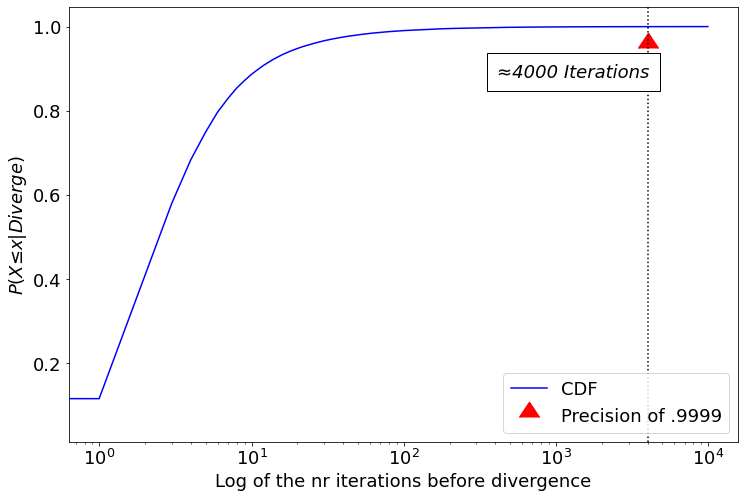

In [12]:
data = all_divergent
count, bins = np.histogram(data,bins=10_000)
pdf = count/ sum(count)
cdf = np.cumsum(count)/len(all_divergent)
print("Of the points that will diverge (that are in the mandelbrot set), CDF of when they diverge.")
plt.figure(figsize=(12,8))
plt.semilogx(bins[:-1], cdf, label="CDF", color='blue')
plt.axvline(nr_iterations,color='black',linestyle=':')

plt.scatter(nr_iterations, percentile-0.05, color='red', marker=10, label='Precision of .9999', s=400,alpha=1)
plt.text(nr_iterations-3600, percentile-0.12, fr'≈4000 Iterations', style='italic',
        bbox={'facecolor':'white','edgecolor': 'black', 'alpha': 1, 'pad': 10})
plt.ylabel(fr"$P(X ≤ x|Diverge)$")
plt.xlabel("Log of the nr iterations before divergence")
plt.legend(loc='lower right')

plt.savefig('figures/'+"cdf_divergence"+'.svg', bbox_inches="tight")

## Sampling methods


##### Visualise the sampling methods.

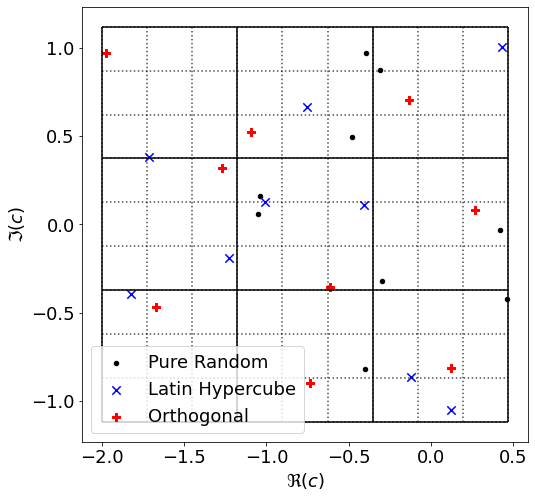

In [13]:
# Parameters
rng = np.random.default_rng(0)
rng2 = np.random.default_rng(2)
n_samples = 9

# generate samples
lh_sample = sa.sample_lh(re_min, re_max, im_min, im_max,rng, n_samples,rng)
pr_sample = sa.sample_pr(re_min, re_max, im_min, im_max,rng,n_samples,rng)
ot_sample = sa.sample_ot(re_min,re_max,im_min,im_max,rng, n_samples=n_samples,rng_2=rng2,antithetic=False)

# plot the scatter plot with the grid
plt.figure(figsize=(8,8))
# Latin hypercube sampling subspaces
for i in range(n_samples+1):
    plt.vlines(np.linspace(re_min, re_max, n_samples+1)[i],color='black',linestyle=":",alpha=0.7, ymin=im_min, ymax=im_max,)
    plt.hlines(np.linspace(im_min, im_max, n_samples+1)[i],color='black',linestyle=":",alpha=0.7, xmin=re_min, xmax=re_max)

# orthogonal sampling subspaces
for i in range(math.isqrt(n_samples)+1):
    plt.hlines(np.linspace(im_min, im_max, math.isqrt(n_samples)+1)[i], xmin=re_min, xmax=re_max,color='black')
    plt.vlines(np.linspace(re_min, re_max, math.isqrt(n_samples)+1)[i], ymin=im_min, ymax=im_max,color='black')

plt.scatter(pr_sample.real,pr_sample.imag,color = 'black',s=20,marker="o",label="Pure Random")
plt.scatter(lh_sample.real,lh_sample.imag,color = 'blue',s=70,marker="x",label="Latin Hypercube")
plt.scatter(ot_sample.real,ot_sample.imag,color = 'red',s=70,marker="P",label="Orthogonal")

plt.ylabel("$\Im(c)$")
plt.xlabel("$\Re(c)$")
plt.legend()
plt.savefig('figures/'+"scattergrid"+'.svg', bbox_inches="tight")

## Convergence of the Area

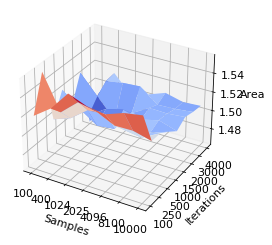

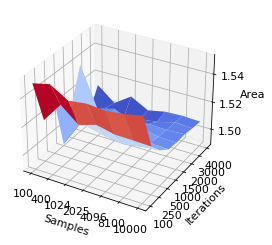

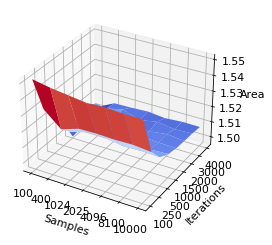

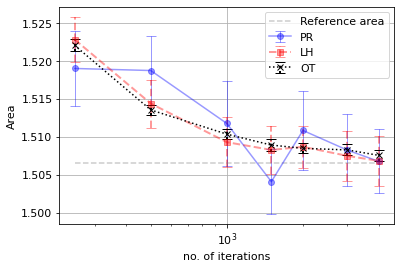

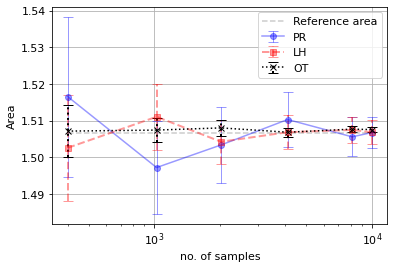

In [14]:
plt.rcParams["font.size"] = 11
## Parameters for samples and iterations
samples = [ i ** 2 for i in [10, 20, 32, 45, 64, 90, 100]]
iterations = [100, 250, 500, 1000, 1500, 2000, 3000, 4000]

# Running the simulation, uncomment next line:
# A_pr, A_lh, A_ot = ar.mc_area(bounds, samples, iterations, 100, False)

# Open pickle files for faster results, 100it is without antithetic variables  
A_pr, A_lh, A_ot = ar.pickleopen('pickle/', '_100it')

# 3D plots of the convergences of the area, 
# uncomment next line if you want them interactive, NB. can be buggy!
# %matplotlib widget
ar.plotarea3D(A_pr, samples, iterations)
ar.plotarea3D(A_lh, samples, iterations)
ar.plotarea3D(A_ot, samples, iterations)

# Convert STD to CI
A_pr[:,:,1] = ar.confidint(A_pr[:,:,1], 100, 1.96)
A_lh[:,:,1] = ar.confidint(A_lh[:,:,1], 100, 1.96)
A_ot[:,:,1] = ar.confidint(A_ot[:,:,1], 100, 1.96)

# Remove the first element of samples and iterations for a more clear plot
pr_it, lh_it, ot_it = A_pr[:,-1,:], A_lh[:,-1,:], A_ot[:,-1,:]
pr_sm, lh_sm, ot_sm = A_pr[-1,:,:], A_lh[-1,:,:], A_ot[-1,:,:]
## Shape of A:  A[iterations, samples, (area, ci)]
ar.plotconv(pr_it[1:], lh_it[1:], ot_it[1:], iterations[1:], 'iterations')
ar.plotconv(pr_sm[1:], lh_sm[1:], ot_sm[1:], samples[1:], 'samples')

## Antithetic variables

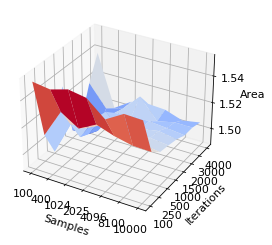

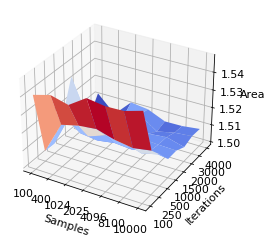

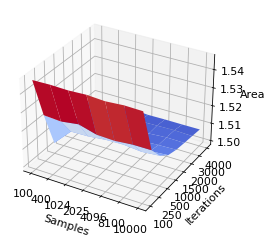

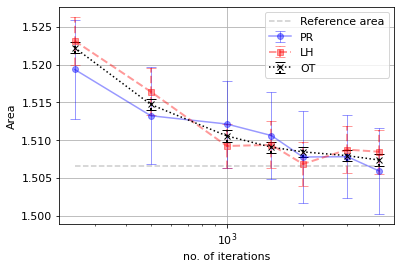

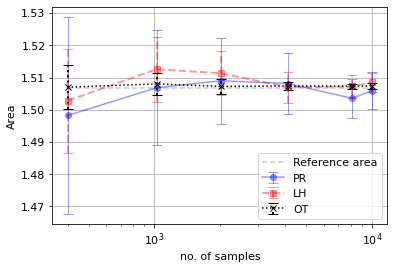

In [15]:
# Running the simulation, uncomment next line:
# A_pr, A_lh, A_ot = ar.mc_area(bounds, samples, iterations, 100, True)

# Open pickle files for faster results, anti100 is with antithetic variables  
A_pr, A_lh, A_ot = ar.pickleopen('pickle/', '__anti100')

# 3D plots of the convergences of the area, 
# uncomment next line if you want them interactive, NB. can be buggy!
# %matplotlib widget
ar.plotarea3D(A_pr, samples, iterations)
ar.plotarea3D(A_lh, samples, iterations)
ar.plotarea3D(A_ot, samples, iterations)

# Convert STD to CI
A_pr[:,:,1] = ar.confidint(A_pr[:,:,1], 100, 1.96)
A_lh[:,:,1] = ar.confidint(A_lh[:,:,1], 100, 1.96)
A_ot[:,:,1] = ar.confidint(A_ot[:,:,1], 100, 1.96)

# Remove the first element of samples and iterations for a more clear plot
pr_it, lh_it, ot_it = A_pr[:,-1,:], A_lh[:,-1,:], A_ot[:,-1,:]
pr_sm, lh_sm, ot_sm = A_pr[-1,:,:], A_lh[-1,:,:], A_ot[-1,:,:]
## Shape of A:  A[iterations, samples, (area, ci)]
ar.plotconv(pr_it[1:], lh_it[1:], ot_it[1:], iterations[1:], 'iterations')
ar.plotconv(pr_sm[1:], lh_sm[1:], ot_sm[1:], samples[1:], 'samples')

# Variance Reduction

##### 1. Simulate area 1000 times to investigate the variance with each approach.

In [16]:
plt.rcParams["font.size"] = 18
# Parameters of the simulation
rng = np.random.default_rng(0)
rng2 = np.random.default_rng(1)
n_samples = 2**10
iterations = 1000
n_simulations = 1000

In [17]:
areas_normal,areas_anti = at.compare_antithetic_area(n_simulations,n_samples,iterations,bounds,rng,rng2,funcs=[sa.sample_pr,sa.sample_lh,sa.sample_ot])

1/3 Sampling methods is done.
2/3 Sampling methods is done.
3/3 Sampling methods is done.




##### 2. Bootstrap confidence intervals and t-tests with 1000 re-redraws of the sample

In [18]:
n_resamples = 1000
# bootstrapped CI's for the Variance of the area for each method
boot_ci_normal = bootstrap((areas_normal,),np.var,axis=0,confidence_level=0.95,n_resamples=n_resamples,random_state=0)
boot_ci_anti = bootstrap((areas_anti,),np.var,axis=0,confidence_level=0.95,n_resamples=n_resamples,random_state=0)

# Data for table
# Variance for Bar chart
norm_var = np.var(areas_normal,axis=0)
norm_ste = boot_ci_normal.standard_error
norm_ci = boot_ci_normal.confidence_interval

anti_var = np.var(areas_anti,axis=0)
anti_ste = boot_ci_anti.standard_error
anti_ci =  boot_ci_anti.confidence_interval

In [19]:
#test variance of area
ttest_pr_anti = at.bootstrapped_t_test(areas_normal[:,0],areas_anti[:,0],seed=0,n_resamples=n_resamples,statistic=np.var)
ttest_lh_anti =at.bootstrapped_t_test(areas_normal[:,1],areas_anti[:,1],seed=0,n_resamples=n_resamples,statistic=np.var)
ttest_ot_anti =at.bootstrapped_t_test(areas_normal[:,2],areas_anti[:,2],seed=0,n_resamples=n_resamples,statistic=np.var)

ttest_pr_lh = at.bootstrapped_t_test(areas_normal[:,0],areas_normal[:,1],seed=0,n_resamples=n_resamples,statistic=np.var)
ttest_lh_ot = at.bootstrapped_t_test(areas_normal[:,1],areas_anti[:,2],seed=0,n_resamples=n_resamples,statistic=np.var)

##### 3. Print the results to use them in the table.

In [20]:
# Table data
print("Table Data (A indicates antithetic sampling)")
print(f"Variances are: \n "
      f"PRS {round(norm_var[0],3)}\t"
      f"LHS {round(norm_var[1],3)}\t"
      f"OT {round(norm_var[2],3)}\n"
      f"A-PRS {round(anti_var[0],3)}\t"
      f"A-LHS {round(anti_var[1],3)}\t"
      f"A-OT {round(anti_var[2],3)}\n")
print(f"Standard Errors are: \n"
      f"PRS {round(norm_ste[0],3)} \t"
      f"LHS {round(norm_ste[1],3)} \t"
      f"OT {round(norm_ste[2],3)} \n "
      f"A-PRS {round(anti_ste[0],3)} \t"
      f"A-LHS {round(anti_ste[1],3)} \t"
      f"A-OT {round(anti_ste[2],3)}\n")
print(f"Bootstrapped CI's are: \n"
      f"PRS {round(norm_ci.low[0],3)},{round(norm_ci.high[0],3)} \t"
      f"LHS {round(norm_ci.low[1],3)},{round(norm_ci.high[1],3)} \t"
      f"OT {round(norm_ci.low[2],3)},{round(norm_ci.high[2],3)} \n"
      f"A-PRS {round(anti_ci.low[0],3)},{round(anti_ci.high[0],3)} \t"
      f"A-LHS {round(anti_ci.low[1],3)},{round(anti_ci.high[1],3)} \t"
      f"A-OT {round(anti_ci.low[2],3)},{round(anti_ci.high[2],3)} \n")
print(f"Delta Var(X)s are: \n"
      f"PRS {round(norm_var[0] - anti_var[0],3)}\t"
      f"LHS {round(norm_var[1] - anti_var[1],3)}\t"
      f"OT {round(norm_var[2] - anti_var[2],3)}\n")
print(f"T-test results for antithetic implementations are: \n"
      f"PRS {ttest_pr_anti} \n"
      f"LHS {ttest_lh_anti} \n"
      f"OT {ttest_ot_anti} \n")
print(f"Pairwise t-test results pr-lh,lh-ot are: \n"
      f"PRS {ttest_pr_lh} \n"
      f"LHS {ttest_lh_ot} \n")

Table Data (A indicates antithetic sampling)
Variances are: 
 PRS 0.006	LHS 0.003	OT 0.0
A-PRS 0.003	A-LHS 0.001	A-OT 0.0

Standard Errors are: 
PRS 0.0 	LHS 0.0 	OT 0.0 
 A-PRS 0.0 	A-LHS 0.0 	A-OT 0.0

Bootstrapped CI's are: 
PRS 0.006,0.007 	LHS 0.002,0.003 	OT 0.0,0.0 
A-PRS 0.003,0.003 	A-LHS 0.001,0.001 	A-OT 0.0,0.0 

Delta Var(X)s are: 
PRS 0.003	LHS 0.002	OT 0.0

T-test results for antithetic implementations are: 
PRS Ttest_indResult(statistic=304.63578196994155, pvalue=0.0) 
LHS Ttest_indResult(statistic=402.78477616431144, pvalue=0.0) 
OT Ttest_indResult(statistic=328.86060000559945, pvalue=0.0) 

Pairwise t-test results pr-lh,lh-ot are: 
PRS Ttest_indResult(statistic=367.68190769766824, pvalue=0.0) 
LHS Ttest_indResult(statistic=648.6014488863958, pvalue=0.0) 



##### 4. Visualise the difference with bootstrapped CI as eror bars.

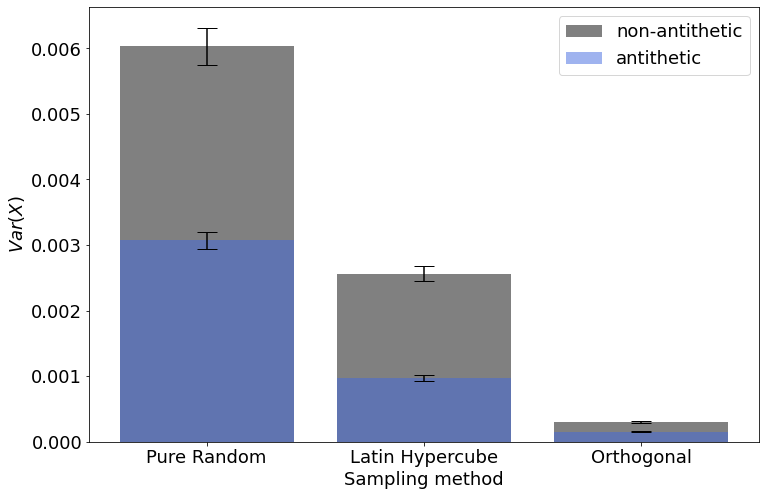

In [21]:
at.draw_bar_antithetic(areas_normal,areas_anti,boot_ci_normal,boot_ci_anti,fname="Barchart_anti")